In [2]:
#!pip install sklearn

In [1]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import scipy.stats as st
import numpy as np
import re
#from sklearn import datasets


from scipy.stats import linregress

#%matplotlib notebook

#import packages
import csv


In [2]:
# Reference the file where the CSV is located
it_data= "data_scientist_US.csv"

# Import the data into a Pandas DataFrame
it_data_df = pd.read_csv(it_data)
df=it_data_df[:]
df

#pattern = re.compile(r'\d*')

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_description,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,We have an immediate opening for a Sharp Data ...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Candidates should have the following backgroun...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Read what people are saying about working here...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,We are seeking an extraordinary Data Scientist...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Join Upstart and help build the future of cred...,Full Time,$100k - 135k | Equity,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Job Summary: Would you like to play a part in ...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,"Data Scientist, (Staff or Principal) at realto...",Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...


In [3]:
df.columns

Index(['crawl_timestamp', 'url', 'job_title', 'category', 'company_name',
       'city', 'state', 'country', 'inferred_city', 'inferred_state',
       'inferred_country', 'post_date', 'job_description', 'job_type',
       'salary_offered', 'job_board', 'geo', 'cursor', 'contact_email',
       'contact_phone_number', 'uniq_id', 'html_job_description'],
      dtype='object')

In [4]:
# CLEANING
# Split the state data set so that each 
# new data frame with split value columns 
# it_data_df['zip'] = it_data_df["state"].str.split(" ", n = 1, expand = True)
# Adding two new columns to the existing dataframe. 
# splitting is done on the basis of underscore. 
df[['zip', 'etc']] = df['state'].str.split(" ", n=2, expand=True)
# split_states = it_data_df["state"].str.split(", ")
# data = split_data.to_list()
# names = ["Capital", "State"]
# new_df = pd.DataFrame(data, columns=names)

ValueError: Columns must be same length as key

In [5]:
# Identifying job descriptions that hold keywords 
# How did we choose these keywords? Based on programming languages we are learning and will learn 
# code source: https://codereview.stackexchange.com/questions/179039/searching-for-keywords-in-dataframe
p = 'python'
for row in it_data_df:
    it_data_df['python'] = it_data_df.astype(str).sum(axis=1).str.contains(p)
# notes from code source: "In my limited experience, for loops are almost always wrong when using Pandas. 
# The primary benefit of Pandas is vectorization, so using the built-in methods is typically best."
it_data_df.head(50)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,False
5,2019-02-06 05:36:06 +0000,https://www.indeed.com/viewjob?jk=14fa3772cd5f...,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,...,Undefined,NaN,indeed,usa,1549436429033307,NaN,NaN,9571ec617ba209fd9a4f842973a4e9c8,NaN,True
6,2019-02-06 05:34:37 +0000,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,...,Undefined,NaN,indeed,usa,1549436429042348,NaN,NaN,0ec629c03f3e82651711f2626c23cadb,NaN,False
7,2019-02-06 05:52:12 +0000,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,Sr. Data Scientist (Can work on Xoriant W2),NaN,Xoriant Corporation,Santa Clara,CA,Usa,Santa clara,California,...,Contract,NaN,dice,usa,1549436429042523,NaN,NaN,972e897473d65f34b8e7f1c1b4c74b1c,NaN,False
8,2019-02-06 05:34:18 +0000,https://www.indeed.com/viewjob?jk=0fc298b9f3a8...,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Undefined,NaN,indeed,usa,1549436429066810,NaN,NaN,80d64b46bc7c89602f63daf06b9f1b4c,NaN,False
9,2019-02-06 06:03:55 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Adroit Resources,San Francisco,CA,Usa,San francisco,California,...,Contract,NaN,dice,usa,1549436429884667,NaN,NaN,b772c6ef8ee7631895ab9a59b5e8b2c1,NaN,False


In [33]:
# Create a dataframe of jobs that have python in the job description
python_df = it_data_df[it_data_df["python"]==True]
python_df
# Print the job descriptions in order to ensure quality of the finds
for row in python_df:
    print(python_df['job_description'])

5       Read what people are saying about working here...
15      Immediate need for Senior Data Scientist with ...
17      Hi, Hope you are doing great. We are having re...
19      Read what people are saying about working here...
51      Job Title: Data Scientist Primary Skills: data...
                              ...                        
9994    Job Summary: Would you like to play a part in ...
9995    Join Upstart and help build the future of cred...
9996    Data Scientist, (Staff or Principal) at realto...
9998    Data Scientist, (Staff or Principal) at realto...
9999    Data Scientist, (Staff or Principal) at realto...
Name: job_description, Length: 352, dtype: object
5       Read what people are saying about working here...
15      Immediate need for Senior Data Scientist with ...
17      Hi, Hope you are doing great. We are having re...
19      Read what people are saying about working here...
51      Job Title: Data Scientist Primary Skills: data...
                      

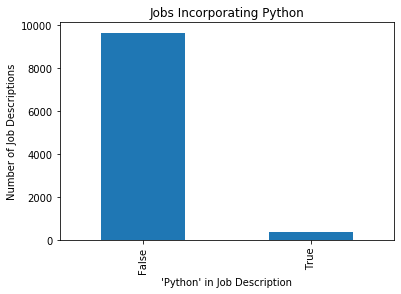

In [35]:
# Create a bar chart showing the number of job descriptions incorporating "Python"
python_plot = it_data_df['python'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating Python")
plt.xlabel("'Python' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("Py_TF_Bars", bbox_inches='tight')
# The data shows a small amount of job descriptions incoporate "Python"
# This may show it is a more specialized skill within the field

In [38]:
# Identifying job descriptions that hold keywords 
# How did we choose these keywords? Based on programming languages we are learning and will learn 
# code source: https://codereview.stackexchange.com/questions/179039/searching-for-keywords-in-dataframe
p = 'excel'
for row in it_data_df:
    it_data_df['excel'] = it_data_df.astype(str).sum(axis=1).str.contains(p)
# notes from code source: "In my limited experience, for loops are almost always wrong when using Pandas. 
# The primary benefit of Pandas is vectorization, so using the built-in methods is typically best."
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python,java,machine learning,SQL,excel
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,False,True,True,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False,False,True,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,True,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,True,True,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False,True,False,False
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,True,False
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,False,False,False,True
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,True,False


In [39]:
# Identifying job descriptions that hold keywords 
# How did we choose these keywords? Based on programming languages we are learning and will learn 
# code source: https://codereview.stackexchange.com/questions/179039/searching-for-keywords-in-dataframe
p = 'Excel'
for row in it_data_df:
    it_data_df['Excel'] = it_data_df.astype(str).sum(axis=1).str.contains(p)
# notes from code source: "In my limited experience, for loops are almost always wrong when using Pandas. 
# The primary benefit of Pandas is vectorization, so using the built-in methods is typically best."
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,contact_email,contact_phone_number,uniq_id,html_job_description,python,java,machine learning,SQL,excel,Excel
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,False,True,True,True,False
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False,False,True,False,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,True,False,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,True,True,False,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,NaN,NaN,445652a560a5441060857853cf267470,NaN,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False,True,False,False,False
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,True,False,True
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,False,False,False,True,False
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,True,False,True


In [40]:
# Identifying job descriptions that hold keywords 
# How did we choose these keywords? Based on programming languages we are learning and will learn 
# code source: https://codereview.stackexchange.com/questions/179039/searching-for-keywords-in-dataframe
p = 'Microsoft Excel'
for row in it_data_df:
    it_data_df['MS Excel'] = it_data_df.astype(str).sum(axis=1).str.contains(p)
# notes from code source: "In my limited experience, for loops are almost always wrong when using Pandas. 
# The primary benefit of Pandas is vectorization, so using the built-in methods is typically best."
it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,contact_phone_number,uniq_id,html_job_description,python,java,machine learning,SQL,excel,Excel,MS Excel
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,False,True,True,True,False,False
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False,False,True,False,False,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,True,False,False,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,True,True,False,False,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,NaN,445652a560a5441060857853cf267470,NaN,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False,True,False,False,False,False
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,True,False,True,False
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,False,False,False,True,False,False
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,True,False,True,False


In [41]:
it_data_df['excel'].value_counts()

False    8476
True     1524
Name: excel, dtype: int64

In [42]:
it_data_df['Excel'].value_counts()

False    7080
True     2920
Name: Excel, dtype: int64

In [44]:
it_data_df['MS Excel'].value_counts()

False    9890
True      110
Name: MS Excel, dtype: int64

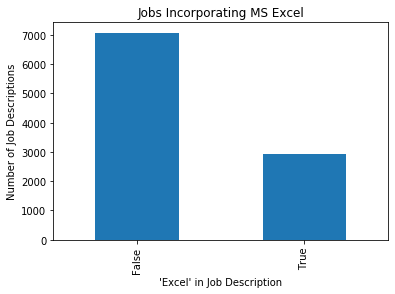

In [45]:
# Create a bar chart showing the number of job descriptions incorporating "Excel"
python_plot = it_data_df['Excel'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating MS Excel")
plt.xlabel("'Excel' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("MSExcel_TF_Bars", bbox_inches='tight')
# The data shows a small amount of job descriptions incoporate "Python"
# This may show it is a more specialized skill within the field

In [9]:
p = 'java'
for row in it_data_df:
    it_data_df['java'] = it_data_df.astype(str).sum(axis=1).str.contains(p)

it_data_df.head(50)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python,java
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,False
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,False,False
5,2019-02-06 05:36:06 +0000,https://www.indeed.com/viewjob?jk=14fa3772cd5f...,CIB – Fixed Income Research – Machine Learning...,Accounting/Finance,JP Morgan Chase,New York,NY 10179 (Midtown area),Usa,New york,New york,...,NaN,indeed,usa,1549436429033307,NaN,NaN,9571ec617ba209fd9a4f842973a4e9c8,NaN,True,False
6,2019-02-06 05:34:37 +0000,https://www.indeed.com/viewjob?jk=c6db96b37f8a...,"Data Scientist, Licensing Operations",Accounting/Finance,Spotify,New York,NY 10011 (Chelsea area),Usa,New york,New york,...,NaN,indeed,usa,1549436429042348,NaN,NaN,0ec629c03f3e82651711f2626c23cadb,NaN,False,False
7,2019-02-06 05:52:12 +0000,https://www.dice.com/jobs/detail/Sr.-Data-Scie...,Sr. Data Scientist (Can work on Xoriant W2),NaN,Xoriant Corporation,Santa Clara,CA,Usa,Santa clara,California,...,NaN,dice,usa,1549436429042523,NaN,NaN,972e897473d65f34b8e7f1c1b4c74b1c,NaN,False,False
8,2019-02-06 05:34:18 +0000,https://www.indeed.com/viewjob?jk=0fc298b9f3a8...,"Data Scientist, Aladdin Wealth Tech, Associate",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,NaN,indeed,usa,1549436429066810,NaN,NaN,80d64b46bc7c89602f63daf06b9f1b4c,NaN,False,False
9,2019-02-06 06:03:55 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Adroit Resources,San Francisco,CA,Usa,San francisco,California,...,NaN,dice,usa,1549436429884667,NaN,NaN,b772c6ef8ee7631895ab9a59b5e8b2c1,NaN,False,False


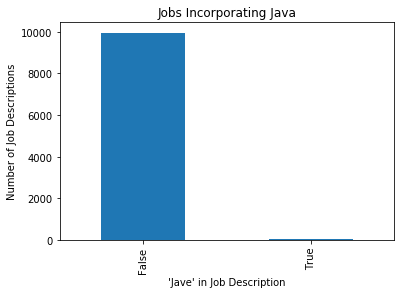

In [36]:
# Create a bar chart showing the number of job descriptions incorporating "Python"
java_plot = it_data_df['java'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating Java")
plt.xlabel("'Jave' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("Java_TF_Bars", bbox_inches='tight')

In [10]:
p = 'machine learning'
for row in it_data_df:
    it_data_df['machine learning'] = it_data_df.astype(str).sum(axis=1).str.contains(p)





0        True
1       False
2        True
3        True
4       False
        ...  
9995     True
9996     True
9997    False
9998     True
9999     True
Name: machine learning, Length: 10000, dtype: bool

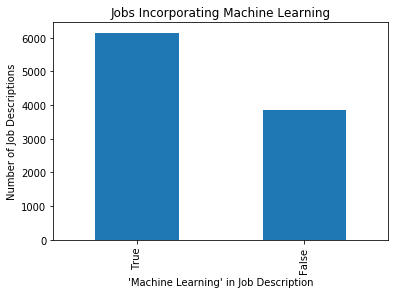

In [28]:
# Create a plot showing the amount of job descriptions incoporating the phrase "Machine Learning"
ml_plot = it_data_df['machine learning'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating Machine Learning")
plt.xlabel("'Machine Learning' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("ML_TF_Bars", bbox_inches='tight')

In [11]:
p = 'SQL'
for row in it_data_df:
    it_data_df['SQL'] = it_data_df.astype(str).sum(axis=1).str.contains(p)

it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python,java,machine learning,SQL
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,False,True,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False,False,True
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,True,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,True,True
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False,True,False
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,True
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,False,False,False
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True,True


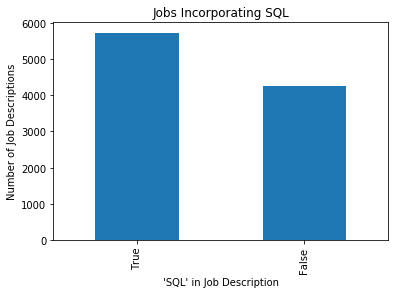

In [34]:
# Create a plot showing the number of jobs incorporating the phrase "SQL" over those that do not
sql_plot = it_data_df['SQL'].value_counts().plot(kind='bar')
plt.title("Jobs Incorporating SQL")
plt.xlabel("'SQL' in Job Description")
plt.ylabel("Number of Job Descriptions")
plt.savefig("SQL_TF_Bars", bbox_inches='tight')

In [ ]:
it_data_df

In [78]:
pythons = it_data_df['python'].value_counts()
javas = it_data_df['java'].value_counts()
machines = it_data_df['machine learning'].value_counts()
it_data_df.plot(y=pythons, javas, machines)

SyntaxError: positional argument follows keyword argument (<ipython-input-78-74d98a34ef3c>, line 4)

In [72]:
machine = it_data_df["machine learning"]==True

machine_learning_df = it_data_df[machine]

In [82]:
machine_plot = it_data_df['machine learning'].value_counts().plot(kind='bar')

In [73]:
# Create a dataframe of jobs that have both "python" and "java" in the job description
python = it_data_df["python"]==True
java = it_data_df["java"]==True

ideal_df = it_data_df[python & java & machine]
ideal_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python,java,R,machine learning
1838,2019-04-20 07:27:24 +0000,https://www.careerbuilder.com/job/J3P49N5Z9ZLH...,Data Scientist III,business and financial operations,CareerBuilder,Atlanta,GA,Usa,Atlanta,Georgia,...,usa,1555747221210075,NaN,NaN,fbe4e25a6e4ca2dee6480767bd158d1e,NaN,True,True,True,True
2737,2019-05-20 06:02:23 +0000,https://www.careerbuilder.com/job/J3R62W5WXYQZ...,Data Scientist III,business and financial operations,CareerBuilder,Atlanta,GA,Usa,Atlanta,Georgia,...,usa,1558335622949454,NaN,NaN,232f22f24bde292c81b54bb924ac1df1,NaN,True,True,True,True
2852,2019-05-20 06:02:23 +0000,https://www.careerbuilder.com/job/J3R62W5WXYQZ...,Data Scientist III,business and financial operations,CareerBuilder,Atlanta,GA,Usa,Atlanta,Georgia,...,usa,1559026864218623,NaN,NaN,232f22f24bde292c81b54bb924ac1df1,NaN,True,True,True,True
2879,2019-05-30 08:50:05 +0000,https://www.careerbuilder.com/job/J3P83B66SQ7P...,Senior Full Stack Data Scientist,life physical and social science,Nike,Portland,OR,Usa,NaN,NaN,...,usa,1559206888427126,NaN,NaN,e44e4abfbcaa7622acfe78a0a8695c8f,NaN,True,True,True,True
3979,2019-07-11 20:39:39 +0000,https://www.indeed.com/viewjob?jk=612097889d44...,Senior Data Scientist,Computer-or-internet,Company Info Follow Get job updates from Catal...,Chicago,IL 60601 (Loop area),US,Chicago,Illinois,...,usa,1562878831342636,NaN,NaN,ad50128b0e45f11cc6c5f3dcbb7bbe04,NaN,True,True,True,True
3980,2019-07-11 20:41:51 +0000,https://www.indeed.com/viewjob?jk=56922ae61a0c...,Principal Data Scientist,Computer-or-internet,Company Info Follow Get job updates from athen...,Watertown,MA 02472,US,Watertown,Massachusetts,...,usa,1562882428766346,NaN,NaN,c3a6eecfafd470fe037384b57226f2d2,NaN,True,True,True,True
4050,2019-07-11 21:39:13 +0000,https://www.indeed.com/viewjob?jk=5d54c55b9189...,Senior Data Scientist,Computer-or-internet,Company Info Follow Get job updates from athen...,Watertown,MA 02472,US,Watertown,Massachusetts,...,usa,1562886030073079,NaN,NaN,935baa32e36da8edaf8d6d365bb27dad,NaN,True,True,True,True
4470,2019-07-16 22:04:26 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist-Machine Learning-C++/Java or Py...,math jobs,Partnership Employment,Hartford,CT,Usa,Hartford,Connecticut,...,usa,1563318021351232,NaN,NaN,9609b6a59857394ea978bebb1e8f1447,NaN,True,True,True,True
4486,2019-07-16 19:33:40 +0000,https://job-openings.monster.com/data-scientis...,Data Scientist-Machine Learning-Ph.D. required...,computer jobs,Perennial Resources International,Hartford,CT,Usa,Hartford,Connecticut,...,usa,1563343244872820,NaN,NaN,15f62f80509a871c019faff550db507c,NaN,True,True,True,True
4540,2019-07-16 19:04:31 +0000,https://www.indeed.com/viewjob?jk=a575800ebaee...,Associate Data Scientist,Sales,Catalina Marketing,Atlanta,GA 30350,US,Atlanta,Georgia,...,usa,1563444142151964,NaN,NaN,0d0813ce7204c10f3109c1a64bb2917f,NaN,True,True,True,True


In [37]:
it_data_df[['python','java','machine learning']].plot(kind='bar')

plt.show()

TypeError: no numeric data to plot

In [ ]:
ideal_df.plot(x="X", y=["A", "B", "C"], kind="bar")

In [48]:
# create data frame of companies showing "java" + "python" in job description
# then plot out in pie chart to show the diversity of the types of companies
companies_df = pd.DataFrame({'company name': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = ideal_df.plot.pie(y='mass', figsize=(5, 5))

KeyError: 'mass'

In [60]:
# I think this returns every row because it does not distinguish "R" as a word but includes it
# within other words
p = 'R'
for row in it_data_df:
    it_data_df['R'] = it_data_df.astype(str).sum(axis=1).str.contains(p)

it_data_df

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,python,java,R
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,False,False,True
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,False,False,True
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,False,False,False
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,False,False,True
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-09-29 00:55:15 +0000,https://stackoverflow.com/jobs/271829,Data Scientist,Data Scientist,Upstart,Columbus,NaN,US,Columbus,Wisconsin,...,Stackoverflow,NaN,1569916870107016,NaN,NaN,e9f2ca58c7abcd4553a4a0be9602312e,<h2>About this job</h2>\r\n<p><span>Compensati...,True,False,True
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,False,False,True
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,True,False,True


In [13]:
python_jobs = []

for i, j in it_data_df.iterrows():
    i = 
    p = 'python'
    if p in j['job_type']:
        python_jobs.append({})
it_data_df   

#  name = weather_json["name"]
#         temperature = weather_json["main"]["temp"]
#  metrics.append({"name": name,
#                         "temperature": temperature,

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

In [16]:
data_sc = it_data_df.groupby('job_title').last()
data_sc

,crawl_timestamp,url,category,company_name,city,state,country,inferred_city,inferred_state,inferred_country,...,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,new column
job_title,,,,,,,,,,,,,,,,,,,,,
(2) Lead Data Scientist (Medicare) (62400BR),2019-08-01 19:55:48 +0000,https://www.indeed.com/viewjob?jk=c6ff04134e30...,Computer-or-internet,Company Info Follow Get job updates from AETNA...,Hartford,CT 06156,US,Hartford,Connecticut,United states,...,Undefined,NaN,indeed,usa,1564693233340454,NaN,NaN,8f5528af19373098c23b8674ac47b7d3,NaN,
"(3) Senior Data Scientist - (Machine Learning, R, Python)",2019-09-09 02:45:06 +0000,https://job-openings.monster.com/3-senior-data...,computer jobs,Aetna,Kansas City,MO,Usa,Kansas city,Missouri,United states,...,Undefined,NaN,monster,usa,1568001621636009,NaN,NaN,71831a3db3668a32ca4787913faab98a,<p>Req ID: 62398BR</p><p>Job Description</p><p...,
"(3) Senior Data Scientist - (Machine Learning, R, Python) (62398BR)",2019-08-01 03:32:34 +0000,https://www.indeed.com/viewjob?jk=d72efc0a1d34...,Administrative,AETNA,Orlando,FL,US,Orlando,Florida,United states,...,Undefined,NaN,indeed,usa,1564632031487642,NaN,NaN,97c031efbcd4b434f78a8aa1b7e81951,NaN,
"(4) Senior Data Scientist - (Machine Learning, R, Python) (62398BR)",2019-07-21 04:19:34 +0000,https://www.indeed.com/viewjob?jk=d72efc0a1d34...,Human-Resources,AETNA,Orlando,FL,US,Orlando,Florida,United states,...,Undefined,NaN,indeed,usa,1563688827241780,NaN,NaN,f2248a15baf4307ec59bd2fa446db45f,NaN,
(Entry Level) Data Scientist,2019-07-28 08:57:48 +0000,https://www.indeed.com/viewjob?jk=93c7db192b1b...,Computer-or-internet,Southern Eagle - Charleston,Charleston,SC 29492,US,Charleston,South carolina,United states,...,Undefined,NaN,indeed,usa,1564308032526840,NaN,NaN,920c88b1cd9d311a093bdc06aa585388,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"data scientist, Econometrician- Marketing Operations- Seattle, WA",2019-09-19 12:07:42 +0000,https://job-openings.monster.com/data-scientis...,social science jobs,Starbucks,Seattle,WA,Usa,Seattle,Washington,United states,...,Undefined,NaN,monster,usa,1568898052375514,NaN,NaN,c8b7cf757434dfaa2dd905b32d3ef27b,<strong>Job Description</strong><br>data scien...,
"data scientist, Insights & Analytics - Seattle, WA",2019-08-13 05:03:51 +0000,https://www.indeed.com/viewjob?jk=89c137588912...,Computer-or-internet,"Starbucks 35,939 reviews - Seattle, WA 98134",Seattle,WA 98134 (Industrial Complex area),US,Seattle,Washington,United states,...,Undefined,NaN,indeed,usa,1565676029314525,NaN,NaN,62a1f2856b12d9432d109330252e8687,NaN,
"data scientist, Supply Chain - Seattle, WA",2019-05-01 09:00:31 +0000,https://www.indeed.com/viewjob?jk=fbd333e9a7d9...,Engineering/Architecture,Starbucks,Seattle,WA 98134 (Industrial Complex area),Usa,Seattle,Washington,Usa,...,Undefined,NaN,indeed,usa,1556704820633743,NaN,NaN,0e092fcb981e825b49ec64d5cfd091cd,NaN,


In [19]:
#Find out what kind of information is in the data

for col in it_data_df.columns: 
    print(col) 



crawl_timestamp
url
job_title
category
company_name
city
state
country
inferred_city
inferred_state
inferred_country
post_date
job_description
job_type
salary_offered
job_board
geo
cursor
contact_email
contact_phone_number
uniq_id
html_job_description
new column


In [20]:
total_rows = it_data_df['crawl_timestamp'].count
print (total_rows)


<bound method Series.count of 0       2019-02-06 05:26:22 +0000
1       2019-02-06 05:33:41 +0000
2       2019-02-06 05:33:35 +0000
3       2019-02-06 05:33:42 +0000
4       2019-02-06 05:48:23 +0000
                  ...            
9995    2019-09-29 00:55:15 +0000
9996    2019-10-01 00:50:33 +0000
9997    2019-09-26 00:53:10 +0000
9998    2019-09-27 00:41:31 +0000
9999    2019-09-27 00:53:10 +0000
Name: crawl_timestamp, Length: 10000, dtype: object>


In [21]:
# create a dataframe grouping by the 'job_title' column
sorted_it_df = it_data_df.groupby('job_title')
sorted_it_df.head(50)

,crawl_timestamp,url,job_title,category,company_name,city,state,country,inferred_city,inferred_state,...,job_type,salary_offered,job_board,geo,cursor,contact_email,contact_phone_number,uniq_id,html_job_description,new column
0,2019-02-06 05:26:22 +0000,https://www.indeed.com/viewjob?jk=fd83355c2b23...,Enterprise Data Scientist I,Accounting/Finance,Farmers Insurance Group,Woodland Hills,CA,Usa,Woodland hills,California,...,Undefined,NaN,indeed,usa,1549432819114777,NaN,NaN,3b6c6acfcba6135a31c83bd7ea493b18,NaN,
1,2019-02-06 05:33:41 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Luxoft USA Inc,Middletown,NJ,Usa,Middletown,New jersey,...,Undefined,NaN,dice,usa,1549432819122106,NaN,NaN,741727428839ae7ada852eebef29b0fe,NaN,
2,2019-02-06 05:33:35 +0000,https://www.dice.com/jobs/detail/Data-Scientis...,Data Scientist,NaN,Cincinnati Bell Technology Solutions,New York,NY,Usa,New york,New york,...,Full Time,NaN,dice,usa,1549432819236156,NaN,NaN,cdc9ef9a1de327ccdc19cc0d07dbbb37,NaN,
3,2019-02-06 05:33:42 +0000,https://www.indeed.com/viewjob?jk=841edd86ead2...,"Data Scientist, Aladdin Wealth Tech, Associate...",Accounting/Finance,BlackRock,New York,NY 10055 (Midtown area),Usa,New york,New york,...,Undefined,NaN,indeed,usa,1549432819259473,NaN,NaN,1c8541cd2c2c924f9391c7d3f526f64e,NaN,
4,2019-02-06 05:48:23 +0000,https://job-openings.monster.com/senior-data-s...,Senior Data Scientist,biotech,CyberCoders,Charlotte,NC,Usa,Charlotte,North carolina,...,Full Time,NaN,monster,usa,1549436429015957,NaN,NaN,445652a560a5441060857853cf267470,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,2019-09-29 00:43:50 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Full Time,NaN,Stackoverflow,NaN,1569916869827785,NaN,NaN,d2285b6e99067fb246c0f674995dad7d,<h2>About this job</h2>\r\n<p><span>Job type: ...,
9996,2019-10-01 00:50:33 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Full Time,NaN,Stackoverflow,NaN,1569916870211396,NaN,NaN,efe05f2364ee3df943e952bc68ed95a7,<h2>About this job</h2>\r\n<p><span>Location o...,
9997,2019-09-26 00:53:10 +0000,https://stackoverflow.com/jobs/293326,"Siri - Embedded Data Scientist, Data Organization","Data Scientist, Embedded Developer",Apple Inc.,Pittsburgh,NaN,US,Pittsburgh,Pennsylvania,...,Full Time,NaN,Stackoverflow,NaN,1569916870956579,NaN,NaN,b980054dbb6d3fe1c6a421a237d1495f,NaN,
9998,2019-09-27 00:41:31 +0000,https://stackoverflow.com/jobs/283895,"Data Scientist, (Staff or Principal)",Data Scientist,Realtor.com,Santa Clara,NaN,US,Santa clara,New mexico,...,Full Time,NaN,Stackoverflow,NaN,1569916871226964,NaN,NaN,4b86da9d2b24b87ec3c815d9072ad616,<h2>About this job</h2>\r\n<p><span>Location o...,


In [22]:
# Create a dataframe for counts of data
job_title_count = pd.DataFrame(sorted_it_df['job_title'].count())
job_title_count

,job_title
job_title,
(2) Lead Data Scientist (Medicare) (62400BR),2
"(3) Senior Data Scientist - (Machine Learning, R, Python)",6
"(3) Senior Data Scientist - (Machine Learning, R, Python) (62398BR)",1
"(4) Senior Data Scientist - (Machine Learning, R, Python) (62398BR)",1
(Entry Level) Data Scientist,1
...,...
"data scientist, Econometrician- Marketing Operations- Seattle, WA",1
"data scientist, Insights & Analytics - Seattle, WA",5
"data scientist, Supply Chain - Seattle, WA",2


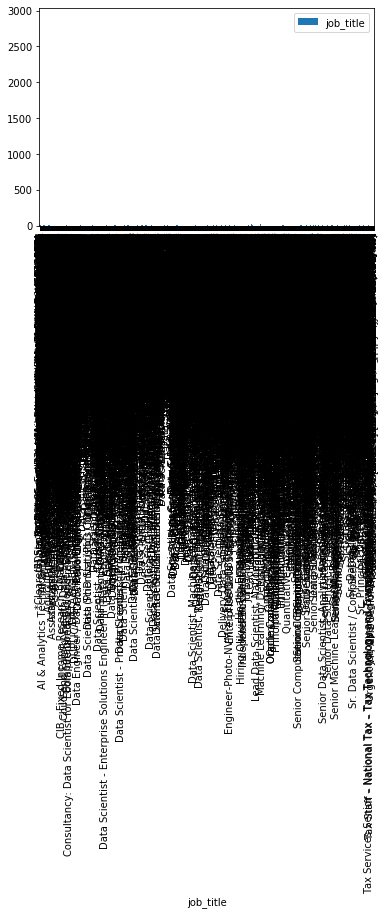

In [27]:
# job_title_count.plot(kind='bar', title="Number of data points for each Job title", color="red")

job_title_count.plot.bar()

# # Set the x and y labels
# plt.set_xlabel("job title")
# plt.set_ylabel("Number of Data Points")
#plt.tight_layout()
# Save the figure
#plt.savefig("PandaBarChart.png")

plt.show()